# Importando bibliotecas

In [ ]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

# Importando Imagem

In [ ]:
!wget -nd -r -P ./ -A jpeg,jpg,bmp,gif,png https://i.imgur.com/dp4UgGl.png

--2021-09-28 23:34:29--  https://i.imgur.com/dp4UgGl.png
Resolving i.imgur.com (i.imgur.com)... 199.232.64.193
Connecting to i.imgur.com (i.imgur.com)|199.232.64.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30698 (30K) [image/png]
Saving to: ‘./dp4UgGl.png.1.tmp’

dp4UgGl.png.1.tmp   100%[===================>]  29.98K  --.-KB/s    in 0.006s  

2021-09-28 23:34:29 (5.05 MB/s) - ‘./dp4UgGl.png.1.tmp’ saved [30698/30698]

Removing ./dp4UgGl.png.1.tmp since it should be rejected.

FINISHED --2021-09-28 23:34:29--
Total wall clock time: 0.1s
Downloaded: 1 files, 30K in 0.006s (5.05 MB/s)


In [ ]:
img_path = "dp4UgGl.png"
img = cv2.imread(img_path, 0)
img2 = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

# Criando Contornos

In [ ]:
image_lower = np.array([0])  
image_upper = np.array([254]) 

mask_hsv = cv2.inRange(img, image_lower, image_upper)
contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 

contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

# Obtendo Areas E Contornos

In [ ]:
maior = None
maior_area = 0
areas = []

for c in contornos:
    area = cv2.contourArea(c)
    areas.append([area,c])

# Selecionando Os Dois Circulos

In [ ]:
areas.sort()
objs = areas[-2:]
centros = []

# Desenhando na imagem

In [ ]:
for obj in objs:
    cv2.drawContours(img2, [obj[-1]], -1, [0, 0, 0], 15)
    M = cv2.moments(obj[-1])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    centros.append((cx,cy))    
    size = 20
    color_line = (40,90,221)
    color_text = (40,90,221)
    
    cv2.line(img2,(cx - size,cy),(cx + size,cy),(255,255,255),5)
    cv2.line(img2,(cx,cy - size),(cx, cy + size),(255,255,255),5)
    font = cv2.FONT_HERSHEY_TRIPLEX 
    text = cy , cx
    origem = (cx-90,cy-155)
    cv2.putText(img2, str(text), origem, font,1,color_text,2,cv2.LINE_AA)    

cv2.line(img2, centros[0], centros[1], color_line, 5)

xangulo = centros[0][0] - centros[1][0]
yangulo = centros[0][1] - centros[1][1]
angulo = int(round(math.degrees(math.atan2(780,414)),0))
cv2.putText(img2, "Angulo: " +str(angulo),(470,200), font,1,color_text,2,cv2.LINE_AA)

array([[[241, 240, 238, 255],
        [240, 239, 238, 255],
        [239, 238, 237, 255],
        ...,
        [241, 240, 238, 255],
        [243, 242, 241, 255],
        [246, 245, 244, 255]],

       [[209, 209, 209, 255],
        [209, 209, 209, 255],
        [209, 209, 209, 255],
        ...,
        [209, 209, 209, 255],
        [239, 238, 237, 255],
        [243, 242, 241, 255]],

       [[209, 209, 209, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [209, 209, 209, 255],
        [236, 235, 233, 255],
        [241, 240, 238, 255]],

       ...,

       [[209, 209, 209, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [209, 209, 209, 255],
        [233, 232, 230, 255],
        [239, 238, 237, 255]],

       [[209, 209, 209, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [209, 209, 209, 255],
        [233, 232, 230, 255],
        [239, 238, 237, 255]],

       [[209

# Exibindo Imagem

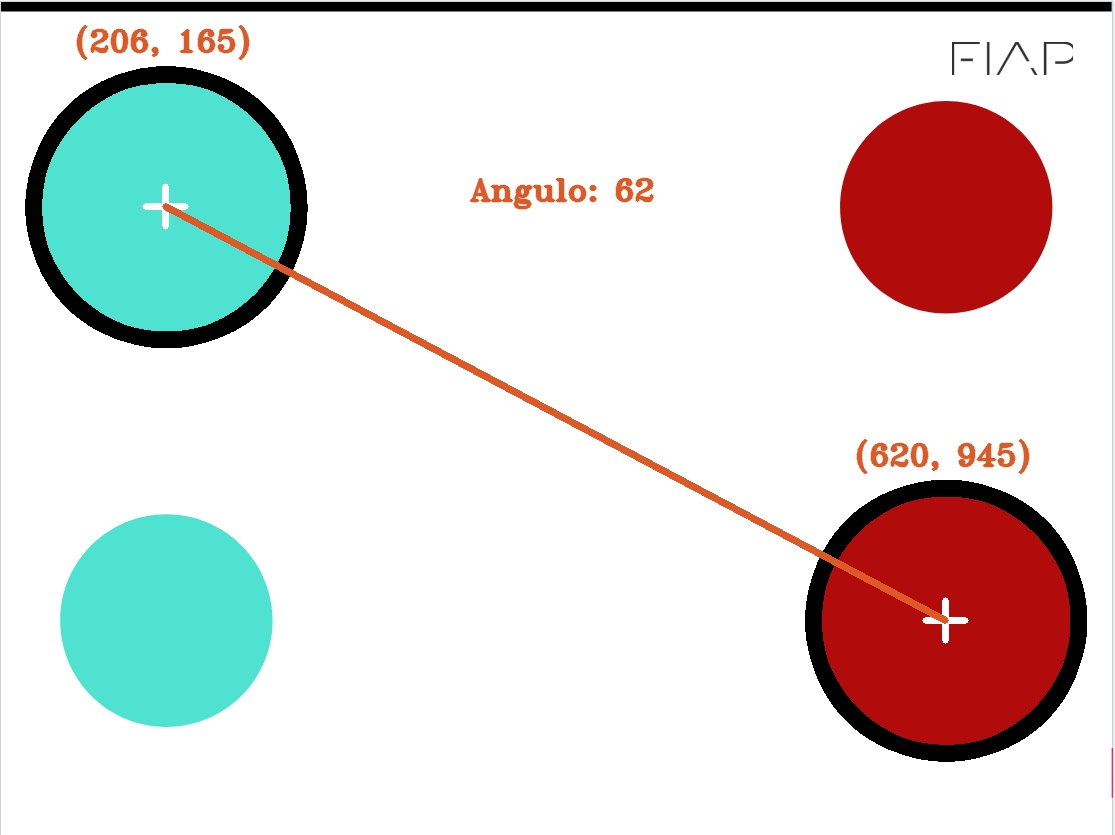

In [ ]:
cv2.imwrite('output.jpg', img2)
r = cv2.imread('output.jpg')
cv2_imshow(r)